# Left-Right symmetric model Lagrangian

In [1]:
from sympy import symbols, init_printing, Matrix, I, Add, eye, sqrt, conjugate, trace, factor, simplify
from sympy.physics import msigma 
init_printing()

## Covariant derivative

In [2]:
g, gBL = symbols('g, g_{B-L}', positive=True)
W1L, W2L, W3L = symbols('W^1_L, W^2_L, W^3_L', real=True)
WL = [W1L, W2L, W3L]
W1R, W2R, W3R = symbols('W^1_R, W^2_R, W^3_R', real=True)
WR = [W1R, W2R, W3R]
Bmu = symbols(r'B_\mu', real=True)
B, L = symbols(r'B, L', real=True)

In [3]:
WL[0]*msigma(1)

⎡  0     W_L__1⎤
⎢              ⎥
⎣W_L__1    0   ⎦

In [4]:
WsigmaL = Add(*[WL[i]*msigma(i+1) for i in range(3)])
WsigmaR = Add(*[WR[i]*msigma(i+1) for i in range(3)])

In [5]:
WsigmaL

⎡     W_L__3        W_L__1 - ⅈ⋅W_L__2⎤
⎢                                    ⎥
⎣W_L__1 + ⅈ⋅W_L__2       -W_L__3     ⎦

In [6]:
WsigmaR

⎡     W_R__3        W_R__1 - ⅈ⋅W_R__2⎤
⎢                                    ⎥
⎣W_R__1 + ⅈ⋅W_R__2       -W_R__3     ⎦

In [7]:
WLp, WLm, WRp, WRm = symbols('W_L^+, W_L^-, W_R^+, W_R^-')
Wcharge_subs = {
    W1L - I*W2L:WLp,
    W1L + I*W2L:WLm,
    W1R - I*W2R:WRp,
    W1R + I*W2R:WRm
}

In [8]:
WsigmaL, WsigmaR = WsigmaL.subs(Wcharge_subs), WsigmaR.subs(Wcharge_subs)

In [9]:
WsigmaL, WsigmaR

⎛⎡W_L__3  W_L__+ ⎤  ⎡W_R__3  W_R__+ ⎤⎞
⎜⎢               ⎥, ⎢               ⎥⎟
⎝⎣W_L__-  -W_L__3⎦  ⎣W_R__-  -W_R__3⎦⎠

## Scalars

### Triplets

In [10]:
deltaLp, deltaLpp = symbols(r'\delta_L^+, \delta_L^{++}')
deltaRp, deltaRpp = symbols(r'\delta_R^+, \delta_R^{++}')

deltaLm, deltaLmm = symbols(r'\delta_L^-, \delta_L^{--}')
deltaRm, deltaRmm = symbols(r'\delta_R^-, \delta_R^{--}')

deltaL0 = symbols(r'\delta_L^0', real=True)
deltaR0 = symbols(r'\delta_R^0', real=True)

In [11]:
sqrt2 = sqrt(2)
DeltaL = Matrix(
    [
        [deltaLp/sqrt2, deltaLpp],
        [deltaL0, -deltaLp/sqrt2]
    ]
)
DeltaR = Matrix(
    [
        [deltaRp/sqrt2, deltaRpp],
        [deltaR0, -deltaRp/sqrt2]
    ]
)

In [12]:
DeltaL, DeltaR

⎛⎡√2⋅\delta_L__+                  ⎤  ⎡√2⋅\delta_R__+                  ⎤⎞
⎜⎢──────────────   \delta_L__{++} ⎥  ⎢──────────────   \delta_R__{++} ⎥⎟
⎜⎢      2                         ⎥  ⎢      2                         ⎥⎟
⎜⎢                                ⎥, ⎢                                ⎥⎟
⎜⎢                -√2⋅\delta_L__+ ⎥  ⎢                -√2⋅\delta_R__+ ⎥⎟
⎜⎢ \delta_L__0    ────────────────⎥  ⎢ \delta_R__0    ────────────────⎥⎟
⎝⎣                       2        ⎦  ⎣                       2        ⎦⎠

In [13]:
from sympy import sin, cos

In [14]:
vL, vR, vRr, vRi, theta = symbols(r'v_L, v_R, v_{Rr}, v_{Ri}, \theta', positive=True)
vevL = {deltaL0:vL/sqrt2, deltaLp:0, deltaLpp:0}
vevR = {deltaR0:(vRr + I*vRi)/sqrt2, deltaRp:0, deltaRpp:0}
vRri = {vRr:vR*cos(theta), vRi: vR*sin(theta)}
DeltaL.subs(vevL), DeltaR.subs(vevR)

⎛⎡  0     0⎤  ⎡          0             0⎤⎞
⎜⎢         ⎥  ⎢                         ⎥⎟
⎜⎢√2⋅v_L   ⎥, ⎢√2⋅(ⅈ⋅v_{Ri} + v_{Rr})   ⎥⎟
⎜⎢──────  0⎥  ⎢──────────────────────  0⎥⎟
⎝⎣  2      ⎦  ⎣          2              ⎦⎠

In [15]:
Dmu_DeltaL = (-I*g/2*(WsigmaL*DeltaL - DeltaL*WsigmaL) - I*gBL*(B-L)/2*Bmu*DeltaL).subs(B-L, 2) # B -L = 2 for triplets L and R
Dmu_DeltaR = (-I*g/2*(WsigmaR*DeltaR - DeltaR*WsigmaR) - I*gBL*(B-L)/2*Bmu*DeltaR).subs(B-L, 2)

In [16]:
Dmu_DeltaL

⎡  √2⋅ⅈ⋅B_\mu⋅\delta_L__+⋅g_{B-L}   ⅈ⋅g⋅(W_L__+⋅\delta_L__0 - W_L__-⋅\delta_L_
⎢- ────────────────────────────── - ──────────────────────────────────────────
⎢                2                                         2                  
⎢                                                                             
⎢                               ⅈ⋅g⋅(-2⋅W_L__3⋅\delta_L__0 + √2⋅W_L__-⋅\delta_
⎢-ⅈ⋅B_\mu⋅\delta_L__0⋅g_{B-L} - ──────────────────────────────────────────────
⎣                                                        2                    

_{++})                                    ⅈ⋅g⋅(2⋅W_L__3⋅\delta_L__{++} - √2⋅W_
──────  -ⅈ⋅B_\mu⋅\delta_L__{++}⋅g_{B-L} - ────────────────────────────────────
                                                                    2         
                                                                              
L__+)     √2⋅ⅈ⋅B_\mu⋅\delta_L__+⋅g_{B-L}   ⅈ⋅g⋅(-W_L__+⋅\delta_L__0 + W_L__-⋅\
─────     ────────────────────────────── - ────────

In [17]:
Dmu_DeltaR

⎡  √2⋅ⅈ⋅B_\mu⋅\delta_R__+⋅g_{B-L}   ⅈ⋅g⋅(W_R__+⋅\delta_R__0 - W_R__-⋅\delta_R_
⎢- ────────────────────────────── - ──────────────────────────────────────────
⎢                2                                         2                  
⎢                                                                             
⎢                               ⅈ⋅g⋅(-2⋅W_R__3⋅\delta_R__0 + √2⋅W_R__-⋅\delta_
⎢-ⅈ⋅B_\mu⋅\delta_R__0⋅g_{B-L} - ──────────────────────────────────────────────
⎣                                                        2                    

_{++})                                    ⅈ⋅g⋅(2⋅W_R__3⋅\delta_R__{++} - √2⋅W_
──────  -ⅈ⋅B_\mu⋅\delta_R__{++}⋅g_{B-L} - ────────────────────────────────────
                                                                    2         
                                                                              
R__+)     √2⋅ⅈ⋅B_\mu⋅\delta_R__+⋅g_{B-L}   ⅈ⋅g⋅(-W_R__+⋅\delta_R__0 + W_R__-⋅\
─────     ────────────────────────────── - ────────

In [18]:
conjugate_fields = {
    conjugate(deltaLp):deltaLm,
    conjugate(deltaLm):deltaLp,
    conjugate(deltaLpp):deltaLmm,
    conjugate(deltaLmm):deltaLpp,
    conjugate(deltaRm):deltaRp,
    conjugate(deltaRp):deltaRm,
    conjugate(deltaRmm):deltaRpp,
    conjugate(deltaRpp):deltaRmm,
    conjugate(WLp):WLm,
    conjugate(WLm):WLp,
    conjugate(WRm):WRp,
    conjugate(WRp):WRm
}

In [19]:
Dmu_DeltaL_dagger = conjugate(Dmu_DeltaL.T).subs(conjugate_fields)
Dmu_DeltaR_dagger = conjugate(Dmu_DeltaR.T).subs(conjugate_fields)

Dmu_DeltaL_dagger, Dmu_DeltaR_dagger


⎛⎡  √2⋅ⅈ⋅B_\mu⋅\delta_L__-⋅g_{B-L}   ⅈ⋅g⋅(-W_L__+⋅\delta_L__{--} + W_L__-⋅\del
⎜⎢  ────────────────────────────── + ─────────────────────────────────────────
⎜⎢                2                                          2                
⎜⎢                                                                            
⎜⎢                                 ⅈ⋅g⋅(2⋅W_L__3⋅\delta_L__{--} - √2⋅W_L__-⋅\d
⎜⎢ⅈ⋅B_\mu⋅\delta_L__{--}⋅g_{B-L} + ───────────────────────────────────────────
⎝⎣                                                           2                

ta_L__0)                                   ⅈ⋅g⋅(-2⋅W_L__3⋅\delta_L__0 + √2⋅W_L
────────     ⅈ⋅B_\mu⋅\delta_L__0⋅g_{B-L} + ───────────────────────────────────
                                                                    2         
                                                                              
elta_L__-)    √2⋅ⅈ⋅B_\mu⋅\delta_L__-⋅g_{B-L}   ⅈ⋅g⋅(W_L__+⋅\delta_L__{--} - W_
──────────  - ────────────────────────────── + ────

In [20]:
Dmu_DL_Dmu = (Dmu_DeltaL_dagger*Dmu_DeltaL).subs(vevL)
Dmu_DL_Dmu.shape

In [21]:
Dmu_DL_Dmu[0,0].simplify()

In [22]:
Dmu_DL_Dmu[1,1].simplify()

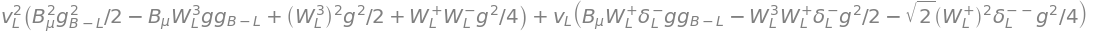

In [23]:
Tr_DmuL = trace(Dmu_DL_Dmu).expand().collect(vL)
Tr_DmuL

In [24]:
Dmu_DR_Dmu = (Dmu_DeltaR_dagger*Dmu_DeltaR).subs(vevR)

In [25]:
Dmu_DR_Dmu

⎡                                    ⎛                                     ⎛  
⎢                                    ⎜                                 ⅈ⋅g⋅⎜-W
⎢                                    ⎜√2⋅ⅈ⋅B_\mu⋅\delta_R__-⋅g_{B-L}       ⎝  
⎢  √2⋅ⅈ⋅W_R__+⋅g⋅(ⅈ⋅v_{Ri} + v_{Rr})⋅⎜────────────────────────────── + ───────
⎢                                    ⎝              2                         
⎢- ───────────────────────────────────────────────────────────────────────────
⎢                                                                  4          
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                           ⎛                                 
⎢         √2⋅ⅈ⋅W_R__+⋅g⋅(ⅈ⋅v_{Ri} + v_{Rr})⋅⎜ⅈ⋅B_\mu⋅\delta_R__{--}⋅g_{B-L} + 
⎢                                           ⎝       

In [26]:
Dmu_DR_Dmu[0,0].simplify()

In [27]:
Dmu_DR_Dmu[1,1].simplify()

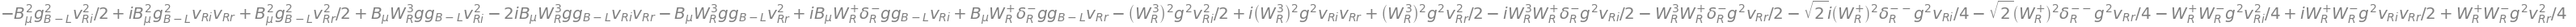

In [28]:
Tr_DmuR = trace(Dmu_DR_Dmu).expand().collect(vR)
Tr_DmuR

### Bidoublet

In [29]:
phi1p, phi1m = symbols(r'\phi_1^+, \phi_1^-')
phi2p, phi2m = symbols(r'\phi_2^+, \phi_2^-')

phi10, phi20 = symbols(r'\phi_1^0, \phi_2^0', real=True)

In [30]:
Phi = Matrix(
    [
        [phi10, phi1p],
        [phi2m, phi20]
    ]
)
Phi

⎡\phi⁰₁  \phi⁺₁⎤
⎢              ⎥
⎣\phi⁻₂  \phi⁰₂⎦

In [31]:
k1, k2, k1r, k1i, alpha = symbols(r"k_1, k_2, k_{1r}, k_{1i}, \alpha", positive=True)
vevPhi = {phi10:(k1r + I*k1i)/sqrt2, phi20:k2/sqrt2, phi1p:0, phi2m:0, phi2p:0, phi1m:0}
k1ri = {k1r:k1*cos(alpha), k1i: k1*sin(alpha)}
Phi.subs(vevPhi)

⎡√2⋅(ⅈ⋅k_{1i} + k_{1r})       ⎤
⎢──────────────────────    0  ⎥
⎢          2                  ⎥
⎢                             ⎥
⎢                        √2⋅k₂⎥
⎢          0             ─────⎥
⎣                          2  ⎦

In [32]:
Dmu_Phi = -I*g/2*(WsigmaL*Phi - Phi*WsigmaR) # B - L = 0 for the bidoublet
Dmu_Phi

⎡-ⅈ⋅g⋅(W_L__3⋅\phi⁰₁ - W_R__3⋅\phi⁰₁ + W_L__+⋅\phi⁻₂ - W_R__-⋅\phi⁺₁)    -ⅈ⋅g⋅
⎢─────────────────────────────────────────────────────────────────────   ─────
⎢                                  2                                          
⎢                                                                             
⎢-ⅈ⋅g⋅(-W_L__3⋅\phi⁻₂ - W_R__3⋅\phi⁻₂ + W_L__-⋅\phi⁰₁ - W_R__-⋅\phi⁰₂)   -ⅈ⋅g⋅
⎢──────────────────────────────────────────────────────────────────────  ─────
⎣                                  2                                          

(W_L__3⋅\phi⁺₁ + W_R__3⋅\phi⁺₁ + W_L__+⋅\phi⁰₂ - W_R__+⋅\phi⁰₁)  ⎤
──────────────────────────────────────────────────────────────── ⎥
                             2                                   ⎥
                                                                 ⎥
(-W_L__3⋅\phi⁰₂ + W_R__3⋅\phi⁰₂ + W_L__-⋅\phi⁺₁ - W_R__+⋅\phi⁻₂) ⎥
─────────────────────────────────────────────────────────────────⎥
                             2              

In [33]:
conjugate_scalarsPhi = {
    conjugate(phi1p):phi1m,
    conjugate(phi2p):phi2m,
    conjugate(phi1m):phi1p,
    conjugate(phi2m):phi2p
}

In [34]:
Dmu_Phi_dagger = conjugate(Dmu_Phi.T).subs(conjugate_scalarsPhi).subs(conjugate_fields)
Dmu_Phi_dagger

⎡ⅈ⋅g⋅(W_L__3⋅\phi⁰₁ - W_R__3⋅\phi⁰₁ + W_L__-⋅\phi⁺₂ - W_R__+⋅\phi⁻₁)  ⅈ⋅g⋅(-W_
⎢───────────────────────────────────────────────────────────────────  ────────
⎢                                 2                                           
⎢                                                                             
⎢ⅈ⋅g⋅(W_L__3⋅\phi⁻₁ + W_R__3⋅\phi⁻₁ + W_L__-⋅\phi⁰₂ - W_R__-⋅\phi⁰₁)  ⅈ⋅g⋅(-W_
⎢───────────────────────────────────────────────────────────────────  ────────
⎣                                 2                                           

L__3⋅\phi⁺₂ - W_R__3⋅\phi⁺₂ + W_L__+⋅\phi⁰₁ - W_R__+⋅\phi⁰₂)⎤
────────────────────────────────────────────────────────────⎥
                         2                                  ⎥
                                                            ⎥
L__3⋅\phi⁰₂ + W_R__3⋅\phi⁰₂ + W_L__+⋅\phi⁻₁ - W_R__-⋅\phi⁺₂)⎥
────────────────────────────────────────────────────────────⎥
                         2                                  ⎦

In [35]:
Dmu_Phi_Dmu = (Dmu_Phi_dagger*Dmu_Phi).subs(vevPhi)
Dmu_Phi_Dmu

⎡                                                                             
⎢                2 ⎛√2⋅W_L__3⋅(ⅈ⋅k_{1i} + k_{1r})   √2⋅W_R__3⋅(ⅈ⋅k_{1i} + k_{1
⎢               g ⋅⎜───────────────────────────── - ──────────────────────────
⎢                  ⎝              2                               2           
⎢               ──────────────────────────────────────────────────────────────
⎢                                                4                            
⎢                                                                             
⎢                                                                             
⎢ 2 ⎛  √2⋅W_L__3⋅k₂   √2⋅W_R__3⋅k₂⎞ ⎛√2⋅W_L__-⋅(ⅈ⋅k_{1i} + k_{1r})   √2⋅W_R__-
⎢g ⋅⎜- ──────────── + ────────────⎟⋅⎜───────────────────────────── - ─────────
⎢   ⎝       2              2      ⎠ ⎝              2                      2   
⎢─────────────────────────────────────────────────────────────────────────────
⎣                                        4          

In [36]:
Tr_DmuPhi = trace(Dmu_Phi_Dmu).expand().collect([k1,k2])
Tr_DmuPhi 

### Kinetic Higgs lagrangian

In [37]:
LHiggs = Tr_DmuL + Tr_DmuR + Tr_DmuPhi 

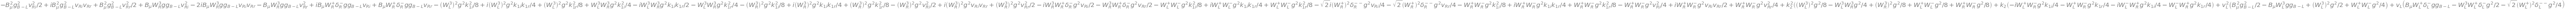

In [38]:
LHiggs

#### $W^\pm$ mass matrix

In [39]:
MW11 = LHiggs.diff(WLm, WLp)
MW12 = LHiggs.diff(WLm, WRp)
MW21 = LHiggs.diff(WRm, WLp)
MW22 = LHiggs.diff(WRm, WRp)

MW = Matrix(
    [
        [MW11, MW12],
        [MW21, MW22]
    ]
)
MW

⎡ 2 ⎛  2         2                             2        2⎞                    
⎢g ⋅⎝k₂  - k_{1i}  + 2⋅ⅈ⋅k_{1i}⋅k_{1r} + k_{1r}  + 2⋅v_L ⎠                    
⎢─────────────────────────────────────────────────────────                    
⎢                            8                                                
⎢                                                                             
⎢                 2                                          2 ⎛  2         2 
⎢               -g ⋅k₂⋅(ⅈ⋅k_{1i} + k_{1r})                  g ⋅⎝k₂  - k_{1i}  
⎢               ───────────────────────────                 ──────────────────
⎣                            4                                                

                2                                                         ⎤
              -g ⋅k₂⋅(ⅈ⋅k_{1i} + k_{1r})                                  ⎥
              ───────────────────────────                                 ⎥
                           4                                

In [40]:
MW.subs(k1ri).subs(vRri).applyfunc(lambda x:x.collect([k1, vR], factor)).subs(alpha,0).subs(theta, 0)

⎡ 2 ⎛  2     2        2⎞          2              ⎤
⎢g ⋅⎝k₁  + k₂  + 2⋅v_L ⎠        -g ⋅k₁⋅k₂        ⎥
⎢───────────────────────        ──────────       ⎥
⎢           8                       4            ⎥
⎢                                                ⎥
⎢        2                 2 ⎛  2     2        2⎞⎥
⎢      -g ⋅k₁⋅k₂          g ⋅⎝k₁  + k₂  + 2⋅v_R ⎠⎥
⎢      ──────────         ───────────────────────⎥
⎣          4                         8           ⎦

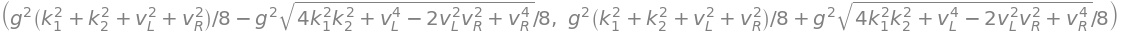

In [41]:
MW1square, MW2square = list(
    MW.subs(k1ri).subs(vRri).applyfunc(lambda x:x.collect([k1, vR], factor)).subs(alpha,0).subs(theta, 0).eigenvals().keys()
)
MW1square, MW2square

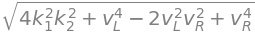

In [42]:
sqrt_vevs = MW1square.args[0].args[2]
sqrt_vevs

In [43]:
sqrt_vevs_sim = (sqrt_vevs.args[0] - k1**2*k2**2).factor() + k1**2*k2**2
sqrt_vevs_sim

Following the hierarchy $v_R >> k_1$ and $k2 >> v_L$
$$ \sqrt{k_1^{2} k_{2}^{2} + \frac{\left(v_{L} - v_{R}\right)^{2} \left(v_{L} + v_{R}\right)^{2}}{4}} \approx 
\sqrt{k_1^{2} k_{2}^{2} + \frac{v_{R}^4}{4}} = \frac{v_R^2}{2}\sqrt{1+x}
$$
where $x = \frac{4 k_1^2k2^2}{v_R^4} << 1$. Then we can use the aproximation $\sqrt{1+x} \approx 1 +\frac{x}{2}$ 

In [44]:
x = (4*k1**2*k2**2)/vR**2
sqrt_vevs_approx = ((vR**2/2)*(1 + x/2)).simplify()
sqrt_vevs_approx

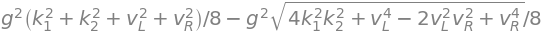

In [45]:
MW1square

In [46]:
kp_square, km_square = symbols('k_+^2, k_-^2', positive=True)
k2pm_subs = {
    k1**2 + k2**2: kp_square,
    k1**2 - k2**2: km_square
}
k2pm_subs

In [47]:
MW1square_approx = MW1square.subs(sqrt_vevs, sqrt_vevs_approx).subs(k2pm_subs).subs(vL,0).expand().collect(kp_square, factor)
MW1square_approx 

In [48]:
MW2square.subs(sqrt_vevs, sqrt_vevs_approx).subs(k2pm_subs).subs(vL,0).expand().collect(kp_square)

In [49]:
MW2square_approx = g**2/4*vR**2

In this approximation 
$$M_{W_1}^2 \approx \frac{g^2}{4}k_+^2\left(1 - \frac{2 k^2 k_1^2}{k_+^2} \right)$$
$$M_{W_2}^2 \approx \frac{g^2}{4}v_R^2$$

In [50]:
MW_approx = Matrix(
    [
        [MW1square_approx, 0 ],
        [0, MW2square_approx]
    ]
)
MW_approx

⎡ 2        2 ⎛    2   2      2⎞         ⎤
⎢g ⋅k²₊   g ⋅⎝2⋅k₁ ⋅k₂  - v_R ⎠         ⎥
⎢────── - ─────────────────────     0   ⎥
⎢  8                16                  ⎥
⎢                                       ⎥
⎢                                 2    2⎥
⎢                                g ⋅v_R ⎥
⎢              0                 ───────⎥
⎣                                   4   ⎦

In this approximation the gauge eigenstates are also approximate mass eigenstates, ans since the expressions for current, etc., are simpler in the $W_{L,R}\pm$ basis ,it is often used in phenomenological studies. The mixing is given by 

$$\binom{W_L^{ \pm}}{W_R^{ \pm}}=\left(\begin{array}{cc}
\cos \zeta & -\sin \zeta e^{i \lambda} \\
\sin \zeta e^{-i \lambda} & \cos \zeta
\end{array}\right)\binom{W_1^{ \pm}}{W_2^{ \pm}} .$$

In [51]:
from sympy import cos, sin, tan

In [52]:
zeta = symbols(r'\zeta', positive=True)
cz = cos(zeta)
sz = sin(zeta)
sz, cz

In [53]:
RW = Matrix(
    [
        [cz, -sz],
        [sz, cz]
    ]
)
RW

⎡cos(\zeta)  -sin(\zeta)⎤
⎢                       ⎥
⎣sin(\zeta)  cos(\zeta) ⎦

In [54]:
W1p, W2p = symbols('W_1^+, W_2^+', real=True)

In [55]:
W12p_doublet = Matrix(
    [
        [W1p],
        [W2p]
    ]
)
W12p_doublet

⎡W⁺₁⎤
⎢   ⎥
⎣W⁺₂⎦

In [56]:
mixingW12 = RW*W12p_doublet
mixingW12

⎡W⁺₁⋅cos(\zeta) - W⁺₂⋅sin(\zeta)⎤
⎢                               ⎥
⎣W⁺₁⋅sin(\zeta) + W⁺₂⋅cos(\zeta)⎦

In [57]:
WLp

In [58]:
WLp_mix = mixingW12[0]
WRp_mix = mixingW12[1]
WLp_mix, WRp_mix

In the limit $\zeta \to 0$, we have

In [59]:
WLp_mix.subs(zeta, 0)

In [60]:
WRp_mix.subs(zeta, 0)

The weak eigenstates are equal to the mass eigenstates

#### Neutral boson mass matrix

In [61]:
from sympy.tensor.array import derive_by_array

In [62]:
WLWRB = [W3L, W3R, Bmu]
M0_square = derive_by_array(derive_by_array(LHiggs, WLWRB), WLWRB).simplify().tomatrix()/2
M0_square

⎡ 2 ⎛  2         2                             2        2⎞                    
⎢g ⋅⎝k₂  - k_{1i}  + 2⋅ⅈ⋅k_{1i}⋅k_{1r} + k_{1r}  + 4⋅v_L ⎠                    
⎢─────────────────────────────────────────────────────────                    
⎢                            8                                                
⎢                                                                             
⎢    2 ⎛    2         2                             2⎞       2 ⎛  2         2 
⎢   g ⋅⎝- k₂  + k_{1i}  - 2⋅ⅈ⋅k_{1i}⋅k_{1r} - k_{1r} ⎠      g ⋅⎝k₂  - k_{1i}  
⎢   ──────────────────────────────────────────────────      ──────────────────
⎢                           8                                                 
⎢                                                                             
⎢                                  2                                          
⎢                    -g⋅g_{B-L}⋅v_L                                           
⎢                    ────────────────               

In [63]:
M0_square = M0_square.subs(vRri).subs(k1ri).subs(alpha, 0).subs(theta, 0).subs(k2pm_subs)

In [64]:
M0_square#.subs(vL, 0)

⎡ 2 ⎛           2⎞        2                             2    ⎤
⎢g ⋅⎝k²₊ + 4⋅v_L ⎠      -g ⋅k²₊           -g⋅g_{B-L}⋅v_L     ⎥
⎢─────────────────      ────────          ────────────────   ⎥
⎢        8                 8                     2           ⎥
⎢                                                            ⎥
⎢      2             2 ⎛           2⎞                   2    ⎥
⎢    -g ⋅k²₊        g ⋅⎝k²₊ + 4⋅v_R ⎠     -g⋅g_{B-L}⋅v_R     ⎥
⎢    ────────       ─────────────────     ────────────────   ⎥
⎢       8                   8                    2           ⎥
⎢                                                            ⎥
⎢              2                  2           2 ⎛   2      2⎞⎥
⎢-g⋅g_{B-L}⋅v_L     -g⋅g_{B-L}⋅v_R     g_{B-L} ⋅⎝v_L  + v_R ⎠⎥
⎢────────────────   ────────────────   ──────────────────────⎥
⎣       2                  2                     2           ⎦

In [65]:
M0_square.subs(vL, 0)

⎡  2             2                            ⎤
⎢ g ⋅k²₊       -g ⋅k²₊                        ⎥
⎢ ──────       ────────              0        ⎥
⎢   8             8                           ⎥
⎢                                             ⎥
⎢  2        2 ⎛           2⎞                2 ⎥
⎢-g ⋅k²₊   g ⋅⎝k²₊ + 4⋅v_R ⎠  -g⋅g_{B-L}⋅v_R  ⎥
⎢────────  ─────────────────  ────────────────⎥
⎢   8              8                 2        ⎥
⎢                                             ⎥
⎢                        2            2    2  ⎥
⎢          -g⋅g_{B-L}⋅v_R      g_{B-L} ⋅v_R   ⎥
⎢   0      ────────────────    ─────────────  ⎥
⎣                 2                  2        ⎦

In [66]:
MZ1_square, MZ2_square, MA_square = list((M0_square.subs(vL,0)).eigenvals().keys()) # list(MW.eigenvals().keys())

In [67]:
MA_square

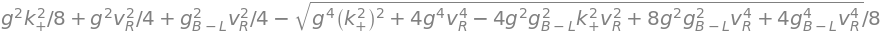

In [68]:
MZ1_square

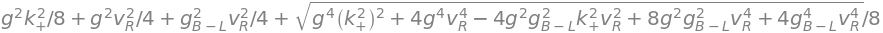

In [69]:
MZ2_square

If $v_R$ is large

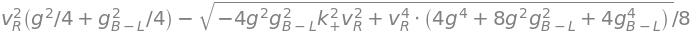

In [70]:
MZ1_square_approx = MZ1_square.subs(g**4*kp_square**2,0).subs(g**2*kp_square/4, 0).collect(vR)
MZ1_square_approx 

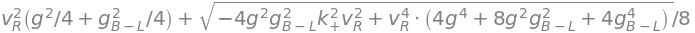

In [71]:
MZ2_square_approx = MZ2_square.subs(g**4*kp_square**2,0).subs(g**2*kp_square/4, 0).collect(vR)
MZ2_square_approx 

In [72]:
MZ_root = ((MZ2_square_approx - MZ1_square_approx)*2).args[0].collect(vR, factor)
MZ_root

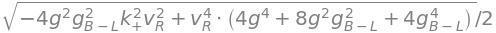

In [73]:
sqrt_Z = (MZ2_square_approx - MZ1_square_approx)*2
sqrt_Z

Following the limit $v_R$ large 
$$ \sqrt{- 4 g^{2} g_{B-L}^{2} k^{2}_{+} v_{R}^{2} + 4 v_{R}^{4} \left(g^{2} + g_{B-L}^{2}\right)^{2}} = 
2v_R^2(g^2 + g_{B-L}^2) \sqrt{1 - \frac{g^{2} g_{B-L}^{2} k^{2}_{+}}{v_{R}^{2} \left(g^{2} + g_{B-L}^{2}\right)^{2}}}
$$
if we consider $x = - \frac{g^{2} g_{B-L}^{2} k^{2}_{+}}{v_{R}^{2} \left(g^{2} + g_{B-L}^{2}\right)^{2}} << 1$. Then we can use the aproximation $\sqrt{1+x} \approx 1 +\frac{x}{2}$ 

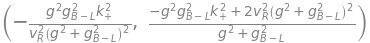

In [74]:
x = - (g**2*gBL**2*kp_square)/(vR**2*(g**2 + gBL**2)**2)
sqrt_Z_approx = ((2*vR**2*(g**2 + gBL**2))*(1 + x/2)).simplify()
x, sqrt_Z_approx

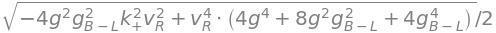

In [75]:
sqrt_Z

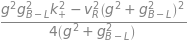

In [76]:
MZ1_square_approx2 = MZ1_square_approx.subs(sqrt_Z, sqrt_Z_approx).simplify()
MZ1_square_approx2

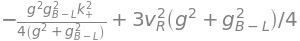

In [77]:
MZ2_square_approx = MZ2_square_approx.subs(sqrt_Z, sqrt_Z_approx).expand().collect(vR, factor)
MZ2_square_approx

Following the definition

$$
\begin{aligned}
& s_W \equiv \sin \theta_W=\frac{g^{\prime}}{\sqrt{g^2+2 g^{\prime 2}}}, \\
& c_W \equiv \cos \theta_W=\sqrt{\frac{g^2+g^{\prime 2}}{g^2+2 g^{\prime 2}}} \\
& s_Y \equiv \sin \theta_Y=\frac{g^{\prime}}{\sqrt{g^2+g^{\prime 2}}} \\
& c_Y \equiv \cos \theta_Y=\frac{g}{\sqrt{g^2+g^{\prime 2}}}
\end{aligned}
$$

Then the mixing among, the weak eigenstates $W_L^3$ $W_R^3$ and $B$ with the physical eigen states is given by
$$
\left(\begin{array}{c}
A \\
Z_1 \\
Z_2
\end{array}\right)=\left(\begin{array}{ccc}
s_W & c_W s_Y & c_W c_Y \\
-c_W & s_W s_Y & s_W c_Y \\
0 & -c_Y & s_Y
\end{array}\right)\left(\begin{array}{c}
W_L^3 \\
W_R^3 \\
B
\end{array}\right)
$$

In [78]:
thW, thY = symbols(r'\theta_W, \theta_Y', positive=True)
cW, sW = cos(thW), sin(thW)
cY, sY = cos(thY), sin(thY)

In [79]:
RZ = Matrix(
    [
        [sW, cW*sY, cW*cY],
        [-cW, sW*sY, sW*cY],
        [0, -cY, sY]
    ]
)
RZ

⎡sin(\theta_W)   sin(\theta_Y)⋅cos(\theta_W)  cos(\theta_W)⋅cos(\theta_Y)⎤
⎢                                                                        ⎥
⎢-cos(\theta_W)  sin(\theta_W)⋅sin(\theta_Y)  sin(\theta_W)⋅cos(\theta_Y)⎥
⎢                                                                        ⎥
⎣      0               -cos(\theta_Y)                sin(\theta_Y)       ⎦

In [80]:
A, Z1, Z2 = symbols('A, Z_1, Z_2', real=True)
AZ12_triplet =  Matrix(
    [
        [A],
        [Z1],
        [Z2]
    ]
)
AZ12_triplet

⎡A ⎤
⎢  ⎥
⎢Z₁⎥
⎢  ⎥
⎣Z₂⎦

In [81]:
mixingAZ12 = RZ.T*AZ12_triplet
mixingAZ12

⎡                       A⋅sin(\theta_W) - Z₁⋅cos(\theta_W)                    
⎢                                                                             
⎢A⋅sin(\theta_Y)⋅cos(\theta_W) + Z₁⋅sin(\theta_W)⋅sin(\theta_Y) - Z₂⋅cos(\thet
⎢                                                                             
⎣A⋅cos(\theta_W)⋅cos(\theta_Y) + Z₁⋅sin(\theta_W)⋅cos(\theta_Y) + Z₂⋅sin(\thet

    ⎤
    ⎥
a_Y)⎥
    ⎥
a_Y)⎦

In [82]:
W3L_mix = mixingAZ12[0]
W3R_mix = mixingAZ12[1]
B_mix = mixingAZ12[2]

In [83]:
W3L_mix, W3L_mix.subs(thY,0)

In [84]:
W3R_mix, W3R_mix.subs(thY,0)

In [85]:
B_mix, B_mix.subs(thY,0)

In [86]:
RZ.subs(thY, 0)

⎡sin(\theta_W)   0   cos(\theta_W)⎤
⎢                                 ⎥
⎢-cos(\theta_W)  0   sin(\theta_W)⎥
⎢                                 ⎥
⎣      0         -1        0      ⎦

## Scalar potential and Higgs mass spectrum

In [87]:
from sympy.physics.quantum import Dagger
from sympy import solve

In [173]:
PhiDagger = Dagger(Phi).subs(conjugate_scalarsPhi)
#PhiDagger
PhiDaggerPhi = PhiDagger*Phi
display(PhiDaggerPhi)
Phitilde = (msigma(2)*conjugate(Phi)*msigma(2)).subs(conjugate_scalarsPhi)
#Phitilde
display(Phitilde)
PhitildePhiDagger = Phitilde*PhiDagger
display(PhitildePhiDagger)
PhitildeDagger = Dagger(Phitilde).subs(conjugate_scalarsPhi)
#PhitildeDagger
display(PhitildeDagger)
PhitildeDaggerPhi = PhitildeDagger*Phi
display(PhitildeDaggerPhi)
PhiPhiDagger = Phi*PhiDagger
display(PhiPhiDagger)
PhiPhitildeDagger = Phi*PhitildeDagger
display(PhiPhitildeDagger)

⎡         2                                                  ⎤
⎢   \phi⁰₁  + \phi⁺₂⋅\phi⁻₂     \phi⁺₁⋅\phi⁰₁ + \phi⁺₂⋅\phi⁰₂⎥
⎢                                                            ⎥
⎢                                                        2   ⎥
⎣\phi⁻₁⋅\phi⁰₁ + \phi⁻₂⋅\phi⁰₂     \phi⁺₁⋅\phi⁻₁ + \phi⁰₂    ⎦

⎡\phi⁰₂   -\phi⁺₂⎤
⎢                ⎥
⎣-\phi⁻₁  \phi⁰₁ ⎦

⎡-\phi⁻₁⋅\phi⁺₂ + \phi⁰₁⋅\phi⁰₂                0               ⎤
⎢                                                              ⎥
⎣              0                 -\phi⁻₁⋅\phi⁺₂ + \phi⁰₁⋅\phi⁰₂⎦

⎡\phi⁰₂   -\phi⁺₁⎤
⎢                ⎥
⎣-\phi⁻₂  \phi⁰₁ ⎦

⎡-\phi⁺₁⋅\phi⁻₂ + \phi⁰₁⋅\phi⁰₂                0               ⎤
⎢                                                              ⎥
⎣              0                 -\phi⁺₁⋅\phi⁻₂ + \phi⁰₁⋅\phi⁰₂⎦

⎡                         2                                  ⎤
⎢   \phi⁺₁⋅\phi⁻₁ + \phi⁰₁      \phi⁺₁⋅\phi⁰₂ + \phi⁰₁⋅\phi⁺₂⎥
⎢                                                            ⎥
⎢                                                        2   ⎥
⎣\phi⁻₁⋅\phi⁰₂ + \phi⁰₁⋅\phi⁻₂     \phi⁺₂⋅\phi⁻₂ + \phi⁰₂    ⎦

⎡-\phi⁺₁⋅\phi⁻₂ + \phi⁰₁⋅\phi⁰₂                0               ⎤
⎢                                                              ⎥
⎣              0                 -\phi⁺₁⋅\phi⁻₂ + \phi⁰₁⋅\phi⁰₂⎦

In [174]:
conjugate_scalars_deltaL = {
    conjugate(deltaLp):deltaLm,
    conjugate(deltaLm):deltaLp,
    conjugate(deltaLpp):deltaLmm,
    conjugate(deltaLmm):deltaLpp
}

conjugate_scalars_deltaR = {
    conjugate(deltaRp):deltaRm,
    conjugate(deltaRm):deltaRp,
    conjugate(deltaRpp):deltaRmm,
    conjugate(deltaRmm):deltaRpp
}

In [175]:
DeltaL

⎡√2⋅\delta_L__+                  ⎤
⎢──────────────   \delta_L__{++} ⎥
⎢      2                         ⎥
⎢                                ⎥
⎢                -√2⋅\delta_L__+ ⎥
⎢ \delta_L__0    ────────────────⎥
⎣                       2        ⎦

In [176]:
DeltaLDagger = Dagger(DeltaL).subs(conjugate_scalars_deltaL)
DeltaLDagger

⎡√2⋅\delta_L__-                  ⎤
⎢──────────────    \delta_L__0   ⎥
⎢      2                         ⎥
⎢                                ⎥
⎢                -√2⋅\delta_L__- ⎥
⎢\delta_L__{--}  ────────────────⎥
⎣                       2        ⎦

In [177]:
DeltaRDagger = Dagger(DeltaR).subs(conjugate_scalars_deltaR)
DeltaRDagger

⎡√2⋅\delta_R__-                  ⎤
⎢──────────────    \delta_R__0   ⎥
⎢      2                         ⎥
⎢                                ⎥
⎢                -√2⋅\delta_R__- ⎥
⎢\delta_R__{--}  ────────────────⎥
⎣                       2        ⎦

In [178]:
DeltaLDeltaLDagger = DeltaL*DeltaLDagger
display(DeltaLDeltaLDagger)
DeltaLDeltaL = DeltaL*DeltaL
display(DeltaLDeltaL)
DeltaLDaggerDeltaL = DeltaLDagger*DeltaL
display(DeltaLDaggerDeltaL)
DeltaLDaggerDeltaLDagger = DeltaLDagger*DeltaLDagger
display(DeltaLDaggerDeltaLDagger)

⎡  \delta_L__+⋅\delta_L__-                                     √2⋅\delta_L__+⋅
⎢  ─────────────────────── + \delta_L__{++}⋅\delta_L__{--}     ───────────────
⎢             2                                                            2  
⎢                                                                             
⎢  √2⋅\delta_L__+⋅\delta_L__{--}   √2⋅\delta_L__-⋅\delta_L__0            \delt
⎢- ───────────────────────────── + ──────────────────────────            ─────
⎣                2                             2                              

\delta_L__0   √2⋅\delta_L__-⋅\delta_L__{++}⎤
─────────── - ─────────────────────────────⎥
                            2              ⎥
                                           ⎥
a_L__+⋅\delta_L__-              2          ⎥
────────────────── + \delta_L__0           ⎥
      2                                    ⎦

⎡           2                                                                 
⎢\delta_L__+                                                                  
⎢──────────── + \delta_L__0⋅\delta_L__{++}                      0             
⎢     2                                                                       
⎢                                                                             
⎢                                                      2                      
⎢                                           \delta_L__+                       
⎢                    0                      ──────────── + \delta_L__0⋅\delta_
⎣                                                2                            

       ⎤
       ⎥
       ⎥
       ⎥
       ⎥
       ⎥
       ⎥
L__{++}⎥
       ⎦

⎡          \delta_L__+⋅\delta_L__-              2              √2⋅\delta_L__+⋅
⎢          ─────────────────────── + \delta_L__0             - ───────────────
⎢                     2                                                    2  
⎢                                                                             
⎢√2⋅\delta_L__+⋅\delta_L__{--}   √2⋅\delta_L__-⋅\delta_L__0    \delta_L__+⋅\de
⎢───────────────────────────── - ──────────────────────────    ───────────────
⎣              2                             2                            2   

\delta_L__0   √2⋅\delta_L__-⋅\delta_L__{++}⎤
─────────── + ─────────────────────────────⎥
                            2              ⎥
                                           ⎥
lta_L__-                                   ⎥
──────── + \delta_L__{++}⋅\delta_L__{--}   ⎥
                                           ⎦

⎡           2                                                                 
⎢\delta_L__-                                                                  
⎢──────────── + \delta_L__0⋅\delta_L__{--}                      0             
⎢     2                                                                       
⎢                                                                             
⎢                                                      2                      
⎢                                           \delta_L__-                       
⎢                    0                      ──────────── + \delta_L__0⋅\delta_
⎣                                                2                            

       ⎤
       ⎥
       ⎥
       ⎥
       ⎥
       ⎥
       ⎥
L__{--}⎥
       ⎦

In [179]:
DeltaRDeltaRDagger = DeltaR*DeltaRDagger
display(DeltaRDeltaRDagger)
DeltaRDeltaR = DeltaR*DeltaR
display(DeltaRDeltaR)
DeltaRDaggerDeltaR = DeltaRDagger*DeltaR
display(DeltaRDaggerDeltaR)
DeltaRDaggerDeltaRDagger = DeltaRDagger*DeltaRDagger
display(DeltaRDaggerDeltaRDagger)

⎡  \delta_R__+⋅\delta_R__-                                     √2⋅\delta_R__+⋅
⎢  ─────────────────────── + \delta_R__{++}⋅\delta_R__{--}     ───────────────
⎢             2                                                            2  
⎢                                                                             
⎢  √2⋅\delta_R__+⋅\delta_R__{--}   √2⋅\delta_R__-⋅\delta_R__0            \delt
⎢- ───────────────────────────── + ──────────────────────────            ─────
⎣                2                             2                              

\delta_R__0   √2⋅\delta_R__-⋅\delta_R__{++}⎤
─────────── - ─────────────────────────────⎥
                            2              ⎥
                                           ⎥
a_R__+⋅\delta_R__-              2          ⎥
────────────────── + \delta_R__0           ⎥
      2                                    ⎦

⎡           2                                                                 
⎢\delta_R__+                                                                  
⎢──────────── + \delta_R__0⋅\delta_R__{++}                      0             
⎢     2                                                                       
⎢                                                                             
⎢                                                      2                      
⎢                                           \delta_R__+                       
⎢                    0                      ──────────── + \delta_R__0⋅\delta_
⎣                                                2                            

       ⎤
       ⎥
       ⎥
       ⎥
       ⎥
       ⎥
       ⎥
R__{++}⎥
       ⎦

⎡          \delta_R__+⋅\delta_R__-              2              √2⋅\delta_R__+⋅
⎢          ─────────────────────── + \delta_R__0             - ───────────────
⎢                     2                                                    2  
⎢                                                                             
⎢√2⋅\delta_R__+⋅\delta_R__{--}   √2⋅\delta_R__-⋅\delta_R__0    \delta_R__+⋅\de
⎢───────────────────────────── - ──────────────────────────    ───────────────
⎣              2                             2                            2   

\delta_R__0   √2⋅\delta_R__-⋅\delta_R__{++}⎤
─────────── + ─────────────────────────────⎥
                            2              ⎥
                                           ⎥
lta_R__-                                   ⎥
──────── + \delta_R__{++}⋅\delta_R__{--}   ⎥
                                           ⎦

⎡           2                                                                 
⎢\delta_R__-                                                                  
⎢──────────── + \delta_R__0⋅\delta_R__{--}                      0             
⎢     2                                                                       
⎢                                                                             
⎢                                                      2                      
⎢                                           \delta_R__-                       
⎢                    0                      ──────────── + \delta_R__0⋅\delta_
⎣                                                2                            

       ⎤
       ⎥
       ⎥
       ⎥
       ⎥
       ⎥
       ⎥
R__{--}⎥
       ⎦

### Higgs potential

In [180]:
mu12, mu22, mu32 = symbols(r'\mu_1^2, \mu_2^2, \mu_3^2', real=True)
lamb1, lamb2, lamb3, lamb4 = symbols(r'\lambda_1, \lambda_2, \lambda_3, \lambda_4', real=True)
rho1, rho2, rho3, rho4 = symbols(r'\rho_1, \rho_2, \rho_3, \rho_4', real=True)
alpha1, alpha2, alpha3 = symbols(r'\alpha_1, \alpha_2, \alpha_3', real=True)
beta1, beta2, beta3 = symbols(r'beta_1, beta_2, beta_3', real=True)

In [181]:
VLRPhi = (
    # Vphi
    -mu12*trace(PhiDaggerPhi)
    - mu22*(trace(Phitilde*PhiDagger) + trace(PhitildeDagger*Phi))
    #
    + lamb1*(trace(PhiPhiDagger))**2
    + lamb2*(trace(PhitildePhiDagger)**2 + trace(PhitildeDaggerPhi)**2)
    + lamb3*trace(PhitildePhiDagger)*trace(PhitildeDaggerPhi)
    + lamb4*trace(PhiDaggerPhi)*(trace(PhitildePhiDagger) + trace(PhitildeDaggerPhi))
    # Vtriplet
    -mu32*(trace(DeltaLDeltaLDagger) + trace(DeltaRDeltaRDagger))
    + rho1*(trace(DeltaLDeltaLDagger)**2 + trace(DeltaRDeltaRDagger)**2)
    + rho2*(trace(DeltaLDeltaL)*trace(DeltaLDaggerDeltaLDagger) + trace(DeltaRDeltaR)*trace(DeltaRDaggerDeltaRDagger))
    + rho3*trace(DeltaLDeltaLDagger)*trace(DeltaRDeltaRDagger)
    + rho4*(trace(DeltaLDeltaL)*trace(DeltaRDaggerDeltaRDagger) + trace(DeltaLDaggerDeltaLDagger)*trace(DeltaRDeltaR))
    # Vdoubletriplet
    + alpha1*trace(PhiDaggerPhi)*(trace(DeltaLDeltaLDagger) + trace(DeltaRDeltaRDagger))
    + alpha2*(
        trace(PhiPhitildeDagger)*trace(DeltaLDeltaLDagger) + trace(PhitildeDaggerPhi)*trace(DeltaRDeltaRDagger) ####checar
        + trace(PhitildeDaggerPhi)*trace(DeltaLDeltaLDagger) + trace(PhitildePhiDagger)*trace(DeltaRDeltaRDagger)
    )
    # + alpha3*(trace(PhiPhiDagger*DeltaLDeltaLDagger) + trace(PhiDaggerPhi*DeltaRDeltaRDagger))
    + beta1*(trace(Phi*DeltaR*PhiDagger*DeltaLDagger) + trace(PhiDagger*DeltaL*Phi*DeltaRDagger))
    + beta2*(trace(Phitilde*DeltaR*PhiDagger*DeltaLDagger) + trace(PhitildeDagger*DeltaL*Phi*DeltaRDagger))
    # beta3 = beta2 in this case
    + beta2*(trace(Phi*DeltaR*PhitildeDagger*DeltaLDagger) + trace(PhiDagger*DeltaL*Phitilde*DeltaRDagger))
)
VLRPhi.subs(vevL).subs(vevR).subs(vevPhi)

In [182]:
vevPhi

In [183]:
VLRPhi_vev = VLRPhi.subs(vevL).subs(vevR).subs(vevPhi)#.collect([mu12, mu22, mu32, lamb2, rho1, beta2], factor)#.subs(k1ri)
VLRPhi_vev

In [184]:
scalar_vevs = [k1r, k1i, k2, vRr, vRi, vL]
tadpoles_relations = {}
for vev in scalar_vevs:
    tadpoles_relations[vev] = VLRPhi_vev.diff(vev).simplify()
    tadpoles_relations[vev] = tadpoles_relations[vev].subs(vRri).subs(k1ri).collect([k1, k2, vR, vL], factor)

In [185]:
from sympy import Symbol

In [186]:
for vev, exp in tadpoles_relations.items():
    display(vev)
    display(exp.atoms(Symbol))
    #display(exp)

In [ ]:
tadpole1 = tadpoles_relations[k1r]#.subs(k2, k1)
tadpole2 = tadpoles_relations[k1i]#.subs(k2, k1)


In [192]:
tadpole1

In [ ]:

tadpole12_sol = solve([tadpole1, tadpole2], [mu12, mu22], dict=True)[0]

In [188]:
from sympy import trigsimp

In [189]:
for param in tadpole12_sol:
    tadpole12_sol[param] = tadpole12_sol[param].collect([k1, k2, vR, vL], trigsimp)

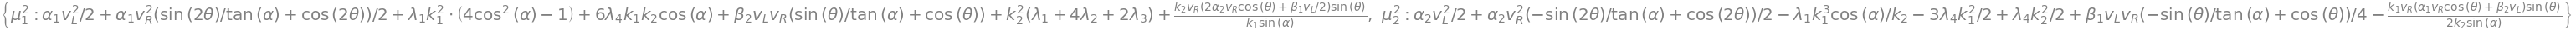

In [190]:
tadpole12_sol

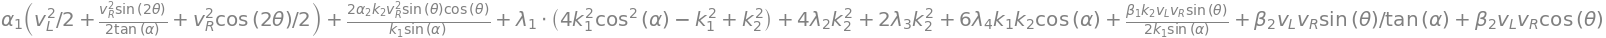

In [191]:
tadpole12_sol[mu12].expand().collect([lamb1, alpha1, lamb4, beta1])

In [107]:
display(
    tadpoles_relations[k2].subs(tadpole12_sol).atoms(Symbol),
    tadpoles_relations[vL].atoms(Symbol)
)

In [108]:
display(
    tadpoles_relations[vRr].atoms(Symbol),
    tadpoles_relations[vRi].atoms(Symbol)
)

In [153]:
tadpoles_relations[vRr]

In [156]:
mu32_sol = solve(tadpoles_relations[vL], mu32, dict=True)[0]
mu32_sol

In [160]:
mu32_sol[mu32].subs(k2, k1).collect(k1, trigsimp)

In [163]:
display(
    tadpoles_relations[vRr].subs(mu32_sol).atoms(Symbol),
    tadpoles_relations[vRi].subs(mu32_sol).atoms(Symbol)
)

In [166]:
tadpole3 = tadpoles_relations[vRr].subs(mu32_sol)
tadpole4 = tadpoles_relations[vRi].subs(mu32_sol)

In [168]:
tadpole3.subs(k2, k1).expand().collect(k1)

In [ ]:

tadpole34_sol = solve([tadpole3, tadpole4], [beta2, rho1], dict=True)[0]

In [ ]:
tadpole34_sol

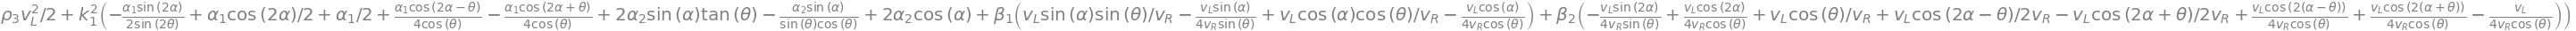

In [133]:
tadpole34_sol[mu32].subs(k2, k1).collect(k1, lambda x: x.collect([beta1, beta2]))

In [139]:
tadpole4.subs(k2, k1).expand().collect(k1, lambda x: x.collect([beta1, beta2]))

In [111]:
display(
    tadpoles_relations[k2].subs(tadpole12_sol).atoms(Symbol),
    tadpoles_relations[vL].subs(tadpole34_sol).atoms(Symbol)
)

In [150]:
tadpoles_relations[vRr].subs(k2, k1).expand().collect(k1)

In [112]:
tadpole5 = tadpoles_relations[k2].subs(tadpole12_sol)#.collect([k1, k2, vR, vL], factor)
tadpole6 = tadpoles_relations[vL].subs(tadpole34_sol)#.collect([k1, k2, vR, vL], factor)
#tadpole34_sol = solve([tadpole3, tadpole4], [mu32, rho1], dict=True)[0]

In [128]:
tadpole5.subs(k2, k1).subs(alpha, theta).factor()

KeyboardInterrupt: 

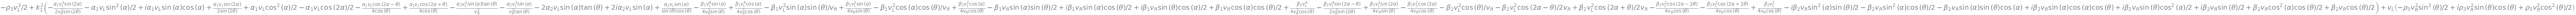

In [125]:
tadpole6.subs(k2, k1).expand().collect([k1, vL , vR], lambda x: x.collect([theta, alpha]))

## Caso $k_2=k_1$

In [284]:
tadpole12_sol_k2eqk1 = {}
for parameter in tadpole12_sol:
    tadpole12_sol_k2eqk1[parameter] = tadpole12_sol[parameter].subs(k2, k1).factor()

tadpole34_sol_k2eqk1 = {}
for parameter in tadpole34_sol:
    tadpole34_sol_k2eqk1[parameter] = tadpole34_sol[parameter].subs(k2, k1).factor()

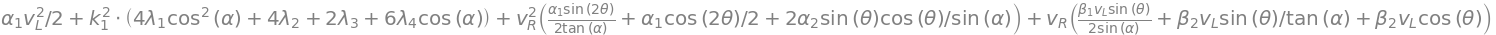

In [285]:
tadpole12_sol_k2eqk1[mu12].expand().collect(
    [k1, k2, vR, vL]#, lambda x: x.collect([lamb1, lamb2, lamb3, lamb4], factor)
)

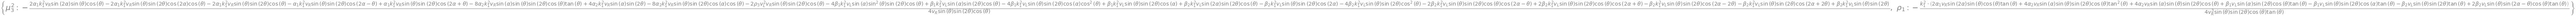

In [286]:
tadpole34_sol_k2eqk1

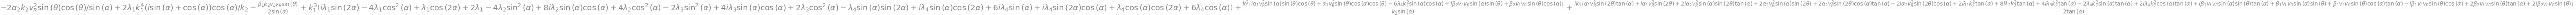

In [287]:
tadpol5_k2eqk1 = tadpole5.subs(k2, k1).subs(tadpole12_sol).subs(tadpole34_sol).expand().collect([k1, vL, vR], factor)
tadpol5_k2eqk1

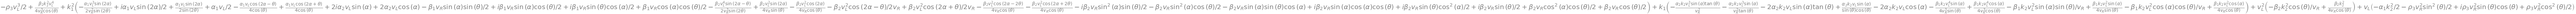

In [288]:
tadpol6_k2eqk1 = tadpole6.subs(k2, k1).subs(tadpole12_sol).subs(tadpole34_sol).expand().collect([k1, vL, vR])
tadpol6_k2eqk1

### sub case $\alpha = \theta$

In [289]:
from sympy import trigsimp, simplify

In [290]:
tadpole12_sol_alphaeqtheta = {}
for parameter in tadpole12_sol_k2eqk1:
    tadpole12_sol_alphaeqtheta[parameter] = tadpole12_sol_k2eqk1[parameter].subs(theta, alpha).collect([k1, vR, vL], trigsimp)

tadpole34_sol_alphaeqtheta = {}
for parameter in tadpole34_sol_k2eqk1:
    tadpole34_sol_alphaeqtheta[parameter] = tadpole34_sol_k2eqk1[parameter].subs(theta, alpha).collect([k1, vR, vL], trigsimp)

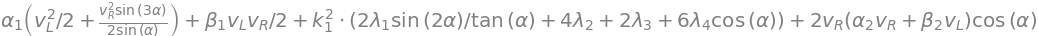

In [291]:
tadpole12_sol_alphaeqtheta[mu12].expand().collect([k1, alpha1, beta1], simplify)

In [182]:
tadpole12_sol_alphaeqtheta[mu22].expand().collect([k1, alpha1, beta1], simplify)

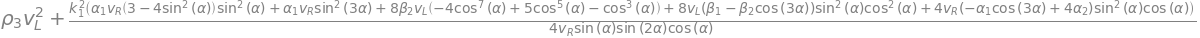

In [183]:
tadpole34_sol_alphaeqtheta[mu32].expand().collect([k1, alpha1, beta1], simplify)

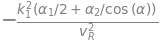

In [184]:
tadpole34_sol_alphaeqtheta[rho1].expand().collect([k1, alpha1, beta1], simplify)

In [185]:
tadpole5_alphaeqtheta = tadpol5_k2eqk1.subs(alpha, theta).collect([k1, vR, vL], trigsimp)
tadpole5_alphaeqtheta

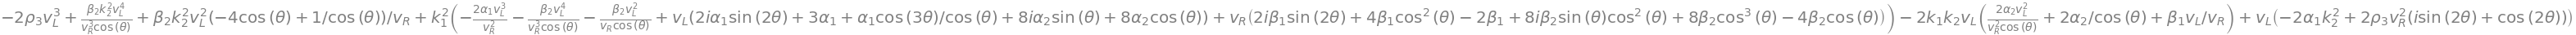

In [186]:
tadpole6_alphaeqtheta = tadpol6_k2eqk1.subs(alpha, theta).collect([k1, vR, vL], trigsimp)
tadpole6_alphaeqtheta

### sub case $\beta_1 = \beta_2 = 0$

In [406]:
tadpole12_sol_betai_zero = {}
for parameter in tadpole12_sol_k2eqk1:
    tadpole12_sol_betai_zero[parameter] = tadpole12_sol_k2eqk1[parameter].subs(beta2, beta1).subs(beta1, 0).collect([k1, vR, vL], trigsimp)

tadpole34_sol_betai_zero = {}
for parameter in tadpole34_sol_k2eqk1:
    tadpole34_sol_betai_zero[parameter] = tadpole34_sol_k2eqk1[parameter].subs(beta2, beta1).subs(beta1, 0).collect([k1, vR, vL], trigsimp)

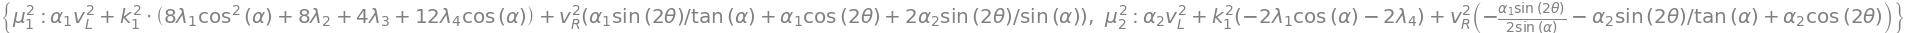

In [407]:
tadpole12_sol_betai_zero

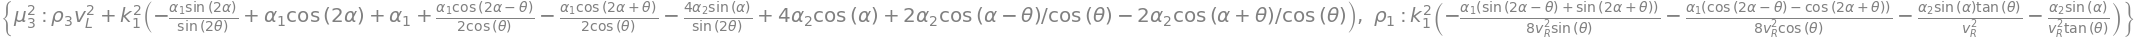

In [408]:
tadpole34_sol_betai_zero

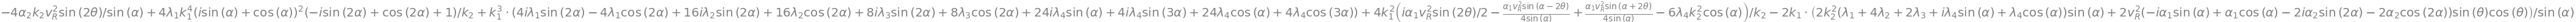

In [409]:
tadpole5_betai_zero = tadpol5_k2eqk1.subs(beta2, beta1).subs(beta1, 0).collect([k1, vR, vL], trigsimp)
tadpole5_betai_zero

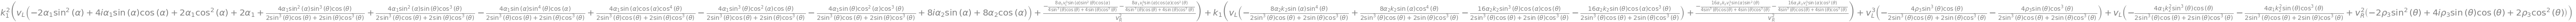

In [414]:
tadpole6_betai_zero = tadpol6_k2eqk1.subs(beta2, beta1).subs(beta1, 0).collect([k1, vR, vL])
tadpole6_betai_zero

In [413]:
vevPhi[phi10].subs(k1ri)

Expand neutral fields in terms of real and imaginary parts
$$F = \frac{1}{\sqrt{2}}(F^r + i F^i)$$

In [98]:
phi10r, phi10i = symbols(r'\phi_1^{0r}, \phi_1^{0i}', real=True)
phi20r, phi20i = symbols(r'\phi_2^{0r}, \phi_2^{0i}', real=True)
deltaR0r, deltaR0i = symbols(r'\delta_R^{0r}, \delta_R^{0i}', real=True)
deltaL0r, deltaL0i = symbols(r'\delta_L^{0r}, \delta_L^{0i}', real=True)
complex_scalar_fields = {
    phi10: (phi10r + I*phi10i)/sqrt2,
    phi20: (phi20r + I*phi20i)/sqrt2,
    deltaR0: (deltaR0r + I*deltaR0i)/sqrt2,
    deltaL0: (deltaL0r + I*deltaL0i)/sqrt2
}

In [99]:
VLRPhi_ri = VLRPhi.subs(complex_scalar_fields)

In [356]:
tadpol1 = VLRPhi.subs(phi10, (phi10r + I*phi10i)/sqrt2).diff(phi10r).subs(vevPhi).subs(vevL).subs(vevR).subs(
    {
        phi10r: k1, phi10i: 0
    }
)
display(tadpol1)
tadpol2 = VLRPhi.subs(phi20, (phi20r + I*phi20i)/sqrt2).diff(phi20r).subs(vevPhi).subs(vevL).subs(vevR).subs(
    {
        phi20r: k2, phi20i: 0
    }
)
tadpol2

In [101]:
tadpol3 = VLRPhi.subs(deltaR0, (deltaR0r + I*deltaR0i)/sqrt2).diff(deltaR0r).subs(vevR).subs(vevPhi).subs(vevL).subs(
    {
        deltaR0r: vR, deltaR0i: 0
    }
)
display(tadpol3)
tadpol4 = VLRPhi.subs(deltaL0, (deltaL0r + I*deltaL0i)/sqrt2).diff(deltaL0r).subs(vevL).subs(vevPhi).subs(vevR).subs(
    {
        deltaL0r: vL, deltaL0i: 0
    }
)
tadpol4

In [102]:
tadpole12_sol = solve([tadpol1, tadpol2], [mu12, mu22], dict=True)[0]

In [128]:
tadpole12_sol

In [134]:
tadpole34_sol = solve([tadpol3, tadpol4], [mu32, rho1], dict=True)[0]

In [135]:
tadpole34_sol

# Scalar ms

In [136]:
caso_k1k2_vL = {k2:k1, kp_square:2*k1**2, km_square:0}

In [137]:
for mu in tadpole12_sol:
    tadpole12_sol[mu] = tadpole12_sol[mu].subs(caso_k1k2_vL).collect(k1, factor)

for mu in tadpole34_sol:
    tadpole34_sol[mu] = tadpole34_sol[mu].subs(caso_k1k2_vL).collect(k1, factor)

In [138]:
tadpole12_sol

In [139]:
tadpole34_sol

In [140]:
VLRPhi_ri_tadpole = VLRPhi_ri.subs(caso_k1k2_vL).subs(tadpole12_sol).subs(mu32, tadpole34_sol[mu32])
VLRPhi_ri_tadpole

In [141]:
Phi.subs(complex_scalar_fields)

⎡√2⋅(ⅈ⋅\phi_1__{0i} + \phi_1__{0r})                                    ⎤
⎢──────────────────────────────────                \phi⁺₁              ⎥
⎢                2                                                     ⎥
⎢                                                                      ⎥
⎢                                    √2⋅(ⅈ⋅\phi_2__{0i} + \phi_2__{0r})⎥
⎢              \phi⁻₂                ──────────────────────────────────⎥
⎣                                                    2                 ⎦

In [142]:
vevPhi[phi10r] = k1
vevPhi[phi10i] = 0
vevPhi[phi20r] = k2
vevPhi[phi20i] = 0

In [143]:
DeltaL.subs(complex_scalar_fields)

⎡            √2⋅\delta_L__+                              ⎤
⎢            ──────────────               \delta_L__{++} ⎥
⎢                  2                                     ⎥
⎢                                                        ⎥
⎢√2⋅(ⅈ⋅\delta_L__{0i} + \delta_L__{0r})  -√2⋅\delta_L__+ ⎥
⎢──────────────────────────────────────  ────────────────⎥
⎣                  2                            2        ⎦

In [144]:
vevL[deltaL0r] = vL
vevL[deltaL0i] = 0
vevR[deltaR0r] = vR
vevR[deltaR0i] = 0

In [ ]:
phir_fields = [phi10r, phi20r, deltaR0r, deltaL0r]
phii_fields = [phi10i, phi20i, deltaR0i, deltaL0i]
phiri_fields = phir_fields + phii_fields
MRI_square = (derive_by_array(derive_by_array(VLRPhi_ri_tadpole, phiri_fields), phiri_fields)/2).subs(
    vevPhi
).subs(vevL).subs(vevR).subs(caso_k1k2_vL).simplify()
MRI_square

⎡                                               2              2              
⎢                                    \alpha₁⋅v_L    \alpha₁⋅v_R               
⎢                                    ──────────── - ──────────── + \lambda₁⋅k₁
⎢                                         4              4                    
⎢                                                                             
⎢                            2              2                 2               
⎢                 \alpha₂⋅v_L    \alpha₂⋅v_R    √2⋅\lambda₁⋅k₁               2
⎢                 ──────────── - ──────────── - ─────────────── + \lambda₁⋅k₁ 
⎢                      2              2                4                      
⎢                                                                             
⎢                                                                             
⎢                                                                      k₁⋅(2⋅\
⎢                                                   

In [164]:
MRI_square.subs(beta2, beta1).subs(beta1, 0).subs(vL, 0).applyfunc(lambda x: x.collect(k1, factor))

⎡                                 2     2                                     
⎢                      \alpha₁⋅v_R    k₁ ⋅(2⋅\lambda₁ + 4⋅\lambda₂ + 2⋅\lambda
⎢                    - ──────────── + ────────────────────────────────────────
⎢                           4                                           2     
⎢                                                                             
⎢                2     2                                                      
⎢     \alpha₂⋅v_R    k₁ ⋅(-4⋅\lambda₁ + √2⋅\lambda₁ - 16⋅\lambda₂ + 8⋅√2⋅\lamb
⎢   - ──────────── - ─────────────────────────────────────────────────────────
⎢          2                                                            4     
⎢                                                                             
⎢                                                                             
⎢                                                 k₁⋅v_R⋅(\alpha₁ + 2⋅\alpha₂)
⎢                                                 ──

In [151]:
vevL

In [152]:
vevL[deltaLmm] = 0
vevL[deltaRmm] = 0
vevL[deltaLm] = 0
vevL[deltaRm] = 0

In [155]:
phip_fields = [phi1p, phi2p, deltaRp, deltaLp]
phim_fields = [phi1m, phi2m, deltaRm, deltaLm]
Mp_square = (derive_by_array(derive_by_array(VLRPhi_ri_tadpole, phim_fields), phip_fields)).subs(
    vevPhi
).subs(vevL).subs(vevR).subs(caso_k1k2_vL).simplify()
Mp_square

⎡           2              2                                                  
⎢\alpha₁⋅v_L    \alpha₁⋅v_R                  2                2               
⎢──────────── - ──────────── - √2⋅\lambda₄⋅k₁  + 2⋅\lambda₄⋅k₁                
⎢     2              2                                                        
⎢                                                                             
⎢                                                                           2 
⎢                                                                \alpha₁⋅v_L  
⎢                              0                                 ──────────── 
⎢                                                                     2       
⎢                                                                             
⎢                                                                             
⎢                     √2⋅k₁⋅v_L⋅(-β₁ - β₂)                                    
⎢                     ────────────────────          

In [191]:
Mp_square.subs(beta2, beta1).subs(beta1, 0)#.subs(vL, 0)

⎡           2              2                                                  
⎢\alpha₁⋅v_L    \alpha₁⋅v_R                  2                2               
⎢──────────── - ──────────── - √2⋅\lambda₄⋅k₁  + 2⋅\lambda₄⋅k₁                
⎢     2              2                                                        
⎢                                                                             
⎢                                                                           2 
⎢                                                                \alpha₁⋅v_L  
⎢                              0                                 ──────────── 
⎢                                                                     2       
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                              0                    

In [180]:
Pp, Dp = Mp_square.subs(beta2, beta1).subs(beta1, 0).subs(vL, 0).tomatrix().diagonalize()

In [181]:
Pp

⎡0  1  0  0⎤
⎢          ⎥
⎢0  0  1  0⎥
⎢          ⎥
⎢0  0  0  1⎥
⎢          ⎥
⎣1  0  0  0⎦

In [184]:
Ppinv = Pp.inv()
Ppinv

⎡0  0  0  1⎤
⎢          ⎥
⎢1  0  0  0⎥
⎢          ⎥
⎢0  1  0  0⎥
⎢          ⎥
⎣0  0  1  0⎦

In [185]:
Pp*Ppinv

⎡1  0  0  0⎤
⎢          ⎥
⎢0  1  0  0⎥
⎢          ⎥
⎢0  0  1  0⎥
⎢          ⎥
⎣0  0  0  1⎦

In [182]:
Dp

⎡ ⎛            2               2            2⎞                                
⎢-⎝2⋅\alpha₁⋅k₁  + 4⋅\alpha₂⋅k₁  + \rho₃⋅v_R ⎠                                
⎢──────────────────────────────────────────────                          0    
⎢                      2                                                      
⎢                                                                             
⎢                                                             2               
⎢                                                  \alpha₁⋅v_R                
⎢                      0                         - ──────────── - √2⋅\lambda₄⋅
⎢                                                       2                     
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                      0                            

In [187]:
Ppinv*Dp*Pp

⎡            2               2            2            2                      
⎢- \alpha₁⋅k₁  - 2⋅\alpha₂⋅k₁  + \rho₁⋅v_R  - \rho₃⋅v_R                       
⎢                                                                             
⎢                                                          ⎛            2     
⎢                                                         -⎝2⋅\alpha₁⋅k₁  + 4⋅
⎢                           0                             ────────────────────
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                           0                                                 
⎢                                                                             
⎢                                                   

In [159]:
phipp_fields = [deltaRpp, deltaLpp]
phippc_fields = [deltaRmm, deltaLmm]
Mpp_square = (derive_by_array(derive_by_array(VLRPhi_ri_tadpole, phippc_fields), phipp_fields)).subs(
    vevPhi
).subs(vevL).subs(vevR).subs(caso_k1k2_vL).simplify().applyfunc(lambda x: x.collect([vL, vR], factor))
Mpp_square

⎡           2        2                                                    2   
⎢  \rho₃⋅v_L    √2⋅k₁ ⋅v_L⋅(β₁ + 2⋅β₂)     2                         √2⋅k₁ ⋅v_
⎢- ────────── - ────────────────────── - k₁ ⋅(\alpha₁ + 2⋅\alpha₂) - ─────────
⎢      2                 v_R                                                  
⎢                                                                             
⎢                                                                 2           
⎢                                                               k₁ ⋅(β₁ + 2⋅β₂
⎢                                             2⋅\rho₄⋅v_L⋅v_R + ──────────────
⎣                                                                      2      

                                                                              
R⋅(β₁ + 2⋅β₂)      2                                                          
───────────── + v_R ⋅(\rho₁ + 2⋅\rho₂ - \rho₃)                                
v_L                                                

In [175]:
Mpp_square.subs(beta2, beta1).subs(beta1, 0).subs(vL, 0)

⎡    2                            2                                           
⎢- k₁ ⋅(\alpha₁ + 2⋅\alpha₂) + v_R ⋅(\rho₁ + 2⋅\rho₂ - \rho₃)                 
⎢                                                                             
⎢                                                                         2   
⎢                                                                \rho₃⋅v_R    
⎢                             0                                - ────────── - 
⎣                                                                    2        

                         ⎤
    0                    ⎥
                         ⎥
                         ⎥
  2                      ⎥
k₁ ⋅(\alpha₁ + 2⋅\alpha₂)⎥
                         ⎦

## Scalar mass spectrum

Following thr hierarchy $v_R >> k, k_1$

In [171]:
from sympy import ZeroMatrix

In [172]:
def Mass_matrix_approximation(Mass_matrix): # approximation of the mass matrix only terms proportional to vR
    l = Mass_matrix.shape[0]
    M_approx = ZeroMatrix(l,l).as_explicit().as_mutable()
    for i in range(l):
        for j in range(l):
            factors = Mass_matrix[i, j].expand().collect(vR, evaluate=False)
            for key in factors:
                if key == 1:
                    pass
                else:
                    M_approx[i, j] += factors[key]*key
    return M_approx

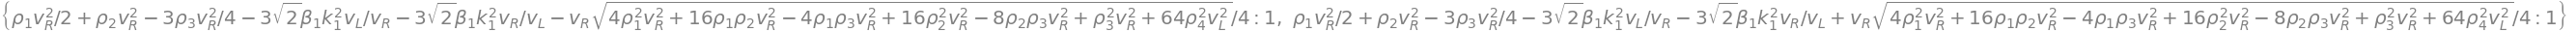

In [174]:
Mass_matrix_approximation(Mpp_square.subs(beta2, beta1)).eigenvals()

In [141]:
Mp_square_approx = Mass_matrix_approximation(Mp_square)
Mp_square_approx

⎡                                                           ⎛          2      
⎢                                                         2 ⎜ \alpha₂⋅k     \a
⎢                         0                            v_R ⋅⎜──────────── - ──
⎢                                                           ⎜   2       2     
⎢                                                           ⎝2⋅k  - 2⋅k₁    2⋅
⎢                                                                             
⎢     ⎛          2              2                   ⎞                         
⎢   2 ⎜ \alpha₂⋅k     \alpha₂⋅k₁     √2⋅\alpha₃⋅k⋅k₁⎟                         
⎢v_R ⋅⎜──────────── - ──────────── + ───────────────⎟                         
⎢     ⎜   2       2      2       2        2       2 ⎟                         
⎢     ⎝2⋅k  - 2⋅k₁    2⋅k  - 2⋅k₁      4⋅k  - 4⋅k₁  ⎠                         
⎢                                                                             
⎢                         0                         

In [142]:
Mp_square_approx.subs(k1,0)

⎡                         2      ⎤
⎢              \alpha₂⋅v_R       ⎥
⎢     0        ────────────  0  0⎥
⎢                   2            ⎥
⎢                                ⎥
⎢           2                    ⎥
⎢\alpha₂⋅v_R                     ⎥
⎢────────────       0        0  0⎥
⎢     2                          ⎥
⎢                                ⎥
⎢     0             0        0  0⎥
⎢                                ⎥
⎣     0             0        0  0⎦

In [140]:
Mpp_square_approx = Mass_matrix_approximation(Mpp_square)
Mpp_square_approx

⎡0  0⎤
⎢    ⎥
⎣0  0⎦

## Yukawa charged lepton sector

In [106]:
from sympy import IndexedBase, Idx

In [107]:
#Indexed?

In [108]:
i,j = symbols('i, j', cls=Idx)
#h = IndexedBase('h')
#ht = IndexedBase(r'\tilde{h}')
hij = symbols('h_{ij}')
htij = symbols(r'\tilde{h}_{ij}')

In [109]:
#ht[i, j]

In [110]:
nueL, numuL, nutauL = symbols(r'{{\nu_{L}}}_e, {{\nu_{L}}}_\mu, {{\nu_{L}}}_\tau')
nueR, numuR, nutauR = symbols(r'{{\nu_{R}}}_e, {{\nu_{R}}}_\mu, {{\nu_{R}}}_\tau')
nuL = IndexedBase(r'{{\nu_{L}}}')
nuR = IndexedBase(r'{{\nu_{R}}}')
eL, muL, tauL = symbols(r'e_L, \mu_L, \tau_L')
eR, muR, tauR = symbols(r'e_R, \mu_R, \tau_R')
lL = IndexedBase('{{l_L}}')
lR = IndexedBase('{{l_R}}')

In [111]:
nueL, nuL[i]

In [112]:
LLi = Matrix(
    [
        [nuL[i]],
        [lL[i]]
    ]
)
LRj = Matrix(
    [
        [nuR[j]],
        [lR[j]]
    ]
)
Dagger(LLi), LRj

⎛⎡______________  __________⎤  ⎡{{\nu_{R}}}[j]⎤⎞
⎜⎣{{\nu_{L}}}[i]  {{l_L}}[i]⎦, ⎢              ⎥⎟
⎝                              ⎣  {{l_R}}[j]  ⎦⎠

In [113]:
Phitilde

⎡\phi⁰₂   -\phi⁻₂⎤
⎢                ⎥
⎣-\phi⁺₁  \phi⁰₁ ⎦

In [114]:
LY = (Dagger(LLi)*(hij*Phi + htij*Phitilde)*LRj)[0].subs(vevPhi)

In [115]:
LY

Charged lepton mass

In [116]:
Ml = LY.args[0].args[0]
Ml

Dirac neutrino mass

In [117]:
MnuD = LY.args[1].args[0]
MnuD

As we know, the scale of mass of charged leptons is greater than neutrino mass scale. Thus, we assume $k >> k_1$ and $h_{ij} >> \tilde{h}_{ij}$. In this aproximation

In [118]:
Ml = k*hij
Ml